### DATA 620

#### Week Five - Part 2 - Assignment: Document Classification


##### Group Four

- Santosh Cheruku
- Vinicio Haro
- Javern Wilson
- Saayed Alam

For this project, we will use the [UCI Machine Learning Repository: Spambase Data Set](http://archive.ics.uci.edu/ml/datasets/Spambase) to predict the class of new documents that are withheld from the training dataset as spam or non-spam.

In [3]:
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from yellowbrick.classifier import ClassificationReport


Import Spambase data file for processing into a pandas dataframe.

In [4]:
path = 'C:/CUNY/GIT/CUNY/Semester2/620-WebAnalytics/Week5/Assignment_SpamDocumentClassification/data/spambase/spambase.data'
spambase = pd.read_csv(path, sep=",", header=None)

Rename columns. The names for the columns were taken from the spambase.names file

In [5]:
names = ["word_freq_make", 
 "word_freq_address", 
 "word_freq_all", 
 "word_freq_3d", 
 "word_freq_our", 
 "word_freq_over", 
 "word_freq_remove", 
 "word_freq_internet",
 "word_freq_order",        
 "word_freq_mail",         
 "word_freq_receive",      
 "word_freq_will",     
 "word_freq_people",
 "word_freq_report",       
 "word_freq_addresses",    
 "word_freq_free",       
 "word_freq_business",     
 "word_freq_email",        
 "word_freq_you",         
 "word_freq_credit",       
 "word_freq_your",         
 "word_freq_font",         
 "word_freq_000",          
 "word_freq_money",        
 "word_freq_hp",           
 "word_freq_hpl",          
 "word_freq_george",       
 "word_freq_650",          
 "word_freq_lab",          
 "word_freq_labs",         
 "word_freq_telnet",       
 "word_freq_857",          
 "word_freq_data",         
 "word_freq_415",          
 "word_freq_85",           
 "word_freq_technology",   
 "word_freq_1999",         
 "word_freq_parts",        
 "word_freq_pm",           
 "word_freq_direct",       
 "word_freq_cs",           
 "word_freq_meeting",      
 "word_freq_original",     
 "word_freq_project",      
 "word_freq_re",           
 "word_freq_edu",          
 "word_freq_table",        
 "word_freq_conference",   
 "char_freq_;",            
 "char_freq_(",            
 "char_freq_[",            
 "char_freq_!",            
 "char_freq_$",            
 "char_freq_#",            
 "capital_run_length_average",
 "capital_run_length_longest",
 "capital_run_length_total",
 "spam"]
spambase.columns = names

Below is a view of the final dataframe. The features of the first 5 emails are shown.

In [6]:
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
spambase['spam'] = spambase['spam'].replace([0], 'email') #change 0's to email indicating not a spam
spambase['spam'] = spambase['spam'].replace([1], 'spam') # change 1's to spam indicating a spam


Before splitting the data into training and test sets, we had to explicitly specify the independent and dependant variables before going forward. Target is the outcome of the email we wish to predict based on the features provided.


In [8]:
target = spambase['spam']
features = spambase.drop('spam', axis=1)

The data is split where 20% is witheld in the test set and 80% for the training data

In [9]:
feat_train, feat_test, targ_train, targ_test = train_test_split(features, target,test_size=0.2, random_state = 42)

In [10]:
feat_train.shape

(3680, 57)

In [11]:
feat_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
1370,0.09,0.0,0.09,0.0,0.39,0.09,0.09,0.00,0.19,0.29,...,0.0,0.000,0.139,0.0,0.310,0.155,0.0,6.813,494,1458
3038,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.124,0.124,0.0,0.000,0.000,0.0,1.800,8,45
2361,0.00,0.0,2.43,0.0,0.00,0.00,0.00,0.00,0.27,0.00,...,0.0,0.000,0.344,0.0,0.000,0.000,0.0,2.319,12,167
156,0.00,0.0,0.00,0.0,1.31,0.00,1.31,1.31,1.31,1.31,...,0.0,0.000,0.000,0.0,0.117,0.117,0.0,48.500,186,291
2526,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.000,0.000,0.0,2.307,8,30


In [12]:
feat_test.shape

(921, 57)

In [13]:
feat_test.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
3683,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.000,1,3
4412,0.71,0.0,0.71,0.0,0.0,0.0,0.0,0.00,0.0,0.71,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.032,2,32
2584,0.00,0.0,0.91,0.0,0.0,0.0,0.0,0.45,0.0,0.00,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.320,7,103
69,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.201,0.000,0.0,0.1,0.0,4.548,59,141
1844,0.00,0.0,0.54,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.188,0.047,0.0,0.0,0.0,1.745,12,89


#### Implementing Models: Gaussian Naive Bayes and Support Vector Machine

Gaussian
Gaussian Naive Bayes is useful when working with continuous values which is what we are working with. It is used in classification and it assumes that features follow a normal distribution.

In [14]:
#Create a Gaussian Classifier
spam_model = GaussianNB()

# Train the model using the training sets 
spam_model.fit(feat_train, targ_train)

#Predict outcome of the first 10 emails 
predicted = spam_model.predict(feat_test)
print (predicted[:10])

['spam' 'email' 'email' 'spam' 'email' 'spam' 'email' 'email' 'email'
 'spam']


In [15]:
print("Gaussian Naive-Bayes Accuracy : ", accuracy_score(targ_test, predicted, normalize = True))

Gaussian Naive-Bayes Accuracy :  0.8208469055374593


##### Performance of model 

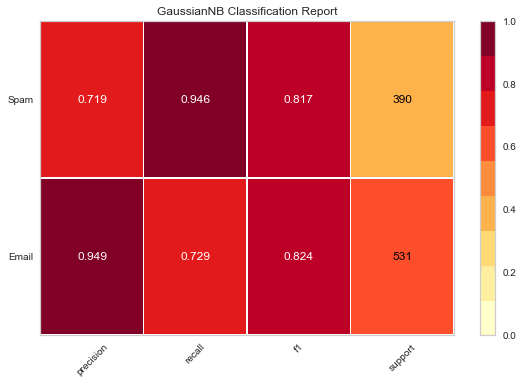

In [16]:
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(spam_model, classes=['Email','Spam'], support = True)
visualizer.fit(feat_train, targ_train) # Fit the training data to the visualizer
visualizer.score(feat_test, targ_test) # Evaluate the model on the test data
visualizer.poof() # Draw results

##### Sources

https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html
https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/